In [1]:
import os
import glob
import importlib
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns

In [2]:
import analyze2p.gratings.utils as gutils
import analyze2p.plotting as pplot
#import analyze2p.arousal.dlc_utils as dlcutils
import analyze2p.aggregate_datasets as aggr
import analyze2p.utils as hutils
import analyze2p.decoding as dec

/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
import importlib

In [4]:
%matplotlib notebook

In [5]:
#### Plotting params
visual_areas, area_colors = pplot.set_threecolor_palette()
pplot.set_plot_params(lw_axes=0.25)
bw_colors = dict((v, [0.7]*3) for v in visual_areas)
#### Set trace ID and FOV/state type
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'
rootdir='/n/coxfs01/2p-data'
fov_type = 'zoom2p0x'
state = 'awake'
traceid = 'traces001'

# Select data to plot

In [6]:
experiment = 'blobs'
trial_epoch = 'stimulus'
responsive_test='ROC'
# --------------------------------------------------------
response_type='dff'
responsive_thr=0.05 if responsive_test=='ROC' else responsive_thr
resp_desc = '%s_responsive-%s-thr%.2f' \
                % (response_type, responsive_test, responsive_thr)
data_id = '|'.join([traceid, resp_desc])
print(data_id)
# ------------------------------------------------------------------
# Load all metdata and assigned cells
sdata, cells0 = aggr.get_aggregate_info(visual_areas=visual_areas, return_cells=True)
experiment_list = ['rfs10', 'rfs'] if experiment=='rfs' else [experiment]
metad = sdata[sdata.experiment.isin(experiment_list)].copy()

traces001|dff_responsive-ROC-thr0.05
/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 12 dsets


# Decoding settings

In [7]:
C_value=1.0
test_split=0.2
cv_nfolds=3
chance_level = 1/8. if experiment=='gratings' else 0.5

In [8]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [9]:
analysis_type='by_fov'
test_type= 'size_single' #'ori_single' #'size_single'
class_name = 'morphlevel'
variation_name = None
match_rfs = False
overlap_thr= None #[0, 0.25, 0.5]
split_arousal=True

basedir = dec.create_results_dir(analysis_type=analysis_type, test_type=test_type, 
                                class_name=class_name, variation_name=variation_name,
                                 split_arousal=split_arousal)

Created dir
Base output dir: /n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_fov/morphlevel/size_single_arousal


#### Set output dirs

In [10]:
aggr_id = dec.create_aggregate_id(C_value=C_value, 
                            trial_epoch=trial_epoch,
                            responsive_test=responsive_test,
                            match_rfs=match_rfs, overlap_thr=overlap_thr)
dst_dir = os.path.join(basedir, aggr_id)
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)
print(dst_dir)
print(aggr_id)

FIGDIR = os.path.join(aggregate_dir, 'FIGURES', 'decoding')
if not os.path.exists(FIGDIR):
    os.makedirs(FIGDIR)

/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_fov/morphlevel/size_single_arousal/dff-ROC__stimulus__noRF__C1.00
dff-ROC__stimulus__noRF__C1.00


# Load data

In [54]:
experiment = 'gratings' if class_name=='ori' else 'blobs'
print(analysis_type, test_type, class_name, variation_name)
iterdf, missing_ = dec.load_iterdf(metad, class_name,
                          experiment=experiment,
                          analysis_type=analysis_type,
                          test_type=test_type,
                          traceid=traceid,
                          trial_epoch=trial_epoch, responsive_test=responsive_test, 
                          C_value=C_value, break_correlations=False, 
                          match_rfs=match_rfs, overlap_thr=overlap_thr,
                          split_arousal=True)
if match_rfs and (responsive_test=='ROC'):
    iterdf = iterdf[iterdf.n_cells<=96]

by_fov size_single morphlevel None
(V1) Found 14 paths
(Lm) Found 15 paths
(Li) Found 14 paths
    checking for break-corrs
(V1) Found 0 paths
(Lm) Found 0 paths
(Li) Found 0 paths


In [55]:
iterdf.head()

,fit_time,score_time,test_score,train_score,heldout_test_score,C,randi,condition,train_transform,test_transform,n_trials,novel,iteration,n_cells,arousal,visual_area,datakey,intact,noise_corrs,overlap_thr
0,0.376473,0.000925,0.622222,0.939394,0.50,1.0,8764,data,10.0,10.0,20,False,375,7,low,Li,20190316_JC070_fov1,True,intact,None
1,0.005043,0.000291,0.566667,0.878788,0.25,1.0,8764,shuffled,10.0,10.0,20,False,375,7,low,Li,20190316_JC070_fov1,True,intact,None
2,0.376473,0.000925,0.622222,0.939394,0.55,1.0,8764,data,10.0,20.0,20,True,375,7,low,Li,20190316_JC070_fov1,True,intact,None
3,0.376473,0.000925,0.622222,0.939394,0.60,1.0,8764,data,10.0,30.0,20,True,375,7,low,Li,20190316_JC070_fov1,True,intact,None
4,0.376473,0.000925,0.622222,0.939394,0.45,1.0,8764,data,10.0,40.0,20,True,375,7,low,Li,20190316_JC070_fov1,True,intact,None


#### Print out scoretable

In [56]:
del iterdf['overlap_thr']

In [57]:
iterdf.shape, iterdf.dropna().shape

((1290000, 19), (1290000, 19))

In [58]:
grouper = ['visual_area', 'condition', 'iteration', 'arousal']
if test_type=='size_single':
    grouper.extend(['train_transform'])
mean_df0 = dec.average_within_iterations_by_ncells(iterdf.dropna(), 
                            analysis_type=analysis_type, test_type=test_type,
                            grouper=grouper) 
if test_type is not None:
    score_table = mean_df0[ (mean_df0.condition=='data')]\
            .groupby([ 'visual_area', 'arousal', 'train_transform'])\
            .mean()['heldout_test_score'].reset_index()\
            .pivot_table(index=['visual_area', 'arousal'], columns=['train_transform'])
else:
    score_table = mean_df0[(mean_df0.condition=='data')]\
            .groupby([ 'visual_area', 'arousal'])\
            .mean()['heldout_test_score'].reset_index()\
            .pivot_table(index='visual_area', columns='arousal')
print("EXP: %s (class=%s). Test: %s, %s" % (experiment, class_name, test_type, aggr_id))
score_table

EXP: blobs (class=morphlevel). Test: size_single, dff-ROC__stimulus__noRF__C1.00


heldout_test_score                                        
train_transform                   10.0      20.0      30.0      40.0      50.0
visual_area arousal                                                           
Li          high              0.515318  0.538300  0.534501  0.531546  0.569205
            low               0.524179  0.504837  0.510930  0.534483  0.534596
Lm          high              0.503583  0.520888  0.582496  0.588734  0.605120
            low               0.509747  0.526239  0.544698  0.552185  0.560831
V1          high              0.533567  0.613730  0.636620  0.676876  0.685421
            low               0.525699  0.589506  0.592190  0.627502  0.604675

In [59]:
iterdf['novel'].unique()

array([False,  True])

#### Check status of pupil data

In [60]:
import analyze2p.arousal.dlc_utils as dlcutils

In [61]:
# Pupil -------------------------------------------
pupil_feature='pupil_fraction'
pupil_epoch='stimulus'
pupil_snapshot=391800
redo_pupil=False
pupil_framerate=20.
# -------------------------------------------------
alignment_type='trial'
iti_pre=1.0
iti_post=1.0

print("[%s] ITI pre/post: %.2f/%.2f sec\nEpoch: %s, Alignment: %s" \
      % (experiment, iti_pre, iti_post, pupil_epoch, alignment_type))
# Aggregate dataframes
aggr_pupilmetrics, aggr_params, missing_ = dlcutils.aggregate_dataframes(experiment, 
                            trial_epoch=pupil_epoch, alignment_type=alignment_type,
                            in_rate=pupil_framerate, out_rate=pupil_framerate,
                            iti_pre=iti_pre, iti_post=iti_post, return_missing=True,
                            create_new=False, realign=False, recombine=False,
                            exclude_old=True)
something_missing = [i for v in [v for k, v in missing_.items()] for i in v]

print("Missing %i datasets:" % len(something_missing))
missing_

[blobs] ITI pre/post: 1.00/1.00 sec
Epoch: stimulus, Alignment: trial
~~~~~~~~~~~~ Aggregating pupil dataframes. ~~~~~~~~~~~
Re-aggregating
/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
    (blobs) Excluding 20190315_JC070_fov1
    (blobs) Excluding 20190506_JC080_fov1
    (blobs) Excluding 20190501_JC076_fov1
Missing 0 datasets:


{'metrics': array([], dtype=float64), 'traces': array([], dtype=float64)}

In [62]:
check_ = pd.DataFrame([(dk, len(par['missing_trials'])) \
                       for dk, par in aggr_params.items()], columns=['datakey', 'n_missing_trials'])
check_

,datakey,n_missing_trials
0,20190314_JC070_fov1,153
1,20190316_JC070_fov1,0
2,20190319_JC067_fov1,1018
3,20190320_JC067_fov1,649
4,20190321_JC070_fov1,226
5,20190322_JC073_fov1,56
6,20190327_JC073_fov1,0
7,20190422_JC076_fov1,2
8,20190602_JC091_fov1,737
9,20190606_JC091_fov1,754


In [63]:
print((30*50)/2.)


too_many_missing = check_[check_['n_missing_trials']>750]['datakey'].unique()
too_many_missing

750.0


array(['20190319_JC067_fov1', '20190606_JC091_fov1',
       '20190510_JC083_fov1'], dtype=object)

In [64]:
(20*64)/4


320.0

# Get finaldf

In [65]:
print(analysis_type, test_type)
# grouper = ['visual_area', 'condition', 'datakey', 'intact']
grouper = ['visual_area', 'condition', 'datakey', 'arousal'] #, 'novel']
if test_type=='size_single':
    grouper.extend(['train_transform'])
    
iterdf_x = iterdf[~iterdf.datakey.isin(too_many_missing)].copy()
mean_df = dec.average_across_iterations_by_fov(iterdf_x,
                        analysis_type=analysis_type, test_type=test_type,
                        grouper=grouper)
if test_type is not None:
    print("novel:", mean_df['novel'].unique())
print("conditions:", mean_df['condition'].unique())
print("arousal:", mean_df['arousal'].unique())
print("intact/break_cc:", mean_df['intact'].unique())
mean_df.columns

by_fov size_single
novel: [False  True]
conditions: ['data' 'shuffled']
arousal: ['high' 'low']
intact/break_cc: [ True]


Index(['visual_area', 'condition', 'datakey', 'arousal', 'train_transform',
       'novel', 'fit_time', 'score_time', 'test_score', 'train_score',
       'heldout_test_score', 'C', 'randi', 'test_transform', 'n_trials',
       'iteration', 'n_cells', 'intact'],
      dtype='object')

In [66]:
iterdf[['visual_area', 'datakey']].drop_duplicates()['visual_area'].value_counts()

Lm    15
V1    14
Li    14
Name: visual_area, dtype: int64

In [67]:
#### Drop repeats, get finaldf
match_ncells=False
# ---------------------------------
all_counts = mean_df[['visual_area', 'datakey', 'n_cells']].drop_duplicates()
max_ncells = all_counts.groupby('visual_area')['n_cells'].max().min() if match_ncells\
                else all_counts.groupby('visual_area')['n_cells'].max().max() 
min_ncells = all_counts.groupby('visual_area')['n_cells'].min().max() if match_ncells\
                else 10
print(min_ncells, max_ncells)
# Get sample sizes
n_iters = iterdf['iteration'].max() +1
# sample_sizes = [s for s in sorted(iterdf['n_cells'].unique()) if s <=max_ncells]
# xlabels = [1, 32, 96, max_ncells]
# filter too few/too many cells
fov_filter_str = 'matchNcells' if match_ncells else 'allcells'
passdf = mean_df[(mean_df['n_cells']>=min_ncells) 
                    & (mean_df['n_cells']<=max_ncells)].copy()
counts = passdf[['visual_area', 'datakey', 'n_cells']].copy().drop_duplicates()
# Drop repeat FOVs based on N fits
u_dkeys = aggr.drop_repeats(counts, criterion='max', colname='n_cells')
finaldf = pd.concat([g for (va, dk), g in passdf.groupby(['visual_area', 'datakey'])\
                if (va, dk) in u_dkeys])

10 196.0
[V1] Animalid does not exist: JC078 


In [68]:
finaldf.columns

Index(['visual_area', 'condition', 'datakey', 'arousal', 'train_transform',
       'novel', 'fit_time', 'score_time', 'test_score', 'train_score',
       'heldout_test_score', 'C', 'randi', 'test_transform', 'n_trials',
       'iteration', 'n_cells', 'intact'],
      dtype='object')

# Calculate and plot scores

In [69]:
maindf = finaldf.copy() #[finaldf.train_transform!=10].copy()
plot_groupby=['visual_area', 'datakey', 'arousal', 'condition']
# if test_type=='size_single':
#     plot_groupby.extend([ 'train_transform'])
paired_df = maindf\
            .groupby(plot_groupby).mean()\
            .reset_index()
# paired_df['sf'] = paired_df['sf'].round(1)
# plotd = paired_df[(paired_df['size']<200) 
#               & (paired_df['sf']==0.1) & (paired_df['speed']==20)].copy()
plotd = paired_df.copy()

In [70]:
dkey_counts = plotd[['visual_area', 'datakey']].drop_duplicates()\
                .groupby('visual_area').count()
dkey_counts

,datakey
visual_area,
Li,7
Lm,9
V1,8


<IPython.core.display.Javascript object>


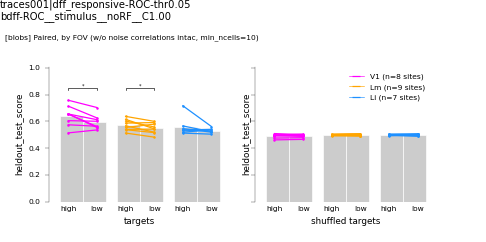

   t_stat  p_val visual_area
1   2.436  0.041          Lm
   t_stat  p_val visual_area
0   2.878  0.024          V1
   t_stat  p_val visual_area condition
0    2.88   0.02          V1      data
1    2.44   0.04          Lm      data
2    1.40   0.21          Li      data
0   -0.58   0.58          V1  shuffled
1   -0.14   0.90          Lm  shuffled
2   -0.42   0.69          Li  shuffled
/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_fov/morphlevel/size_single_arousal/dff-ROC__stimulus__noRF__C1.00 paired_accuracy_break_noisecorrs_heldout_test_score


In [72]:
%matplotlib notebook
c1='high'
c2='low'
compare_var='arousal'
metric='heldout_test_score'
if analysis_type=='by_fov':
    s_=[]
    fig, axn = pl.subplots(1,2, figsize=(6,3), sharex=True, sharey=True)
    for ai, (cond, datad) in enumerate(plotd.groupby('condition')):
        ax=axn[ai]
        ax, pstats = pplot.pairwise_compare_single_metric(datad, 
                         curr_metric=metric, ax=ax, bar_ci=None,
                         c1=c1, c2=c2, compare_var=compare_var,
                         return_stats=True, marker='.', size=2, edgecolor=['w']*3,
                         facecolor=[0.8]*3, annotate=True, sig_lw=0.5,
                         sig_fontsize=4, sig_height=0.01, sig_offset=None)
        pstats['condition'] = cond
        s_.append(pstats)
statsdf = pd.concat(s_, axis=0)
print(statsdf.round(2))

pl.subplots_adjust(left=0.1, right=0.8, bottom=0.25, top=0.75)
for ai, ax in enumerate(axn):
    ax.set_xlabel('')
    #xtick_labels = ['int', 'shuff.']*3
    ax.set_xlabel('targets') if ai==0 else ax.set_xlabel('shuffled targets')
    #ax.set_xticklabels(xtick_labels)
    ax.set_ylim([0, 1.01])
labels = ['%s (n=%i sites)' % (va, dkey_counts.loc[va]) for va in visual_areas]
leg_h = pplot.custom_legend_markers(colors=[area_colors[v] for v in visual_areas],
                                   labels=labels, markers='_')
axn[1].legend(handles=leg_h, bbox_to_anchor=(1,1), loc='upper right', frameon=False)

fig.text(0.01, 0.85, \
    '[%s] Paired, by FOV (w/o noise correlations intac, min_ncells=%i)'\
         % (experiment, min_ncells))
pplot.label_figure(fig, '%s\nb%s' % (data_id, aggr_id))

figname = 'paired_accuracy_break_noisecorrs_%s' % metric
pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))
print(dst_dir, figname)

In [40]:
pstats

,t_stat,p_val,visual_area,condition
0,-2.585,0.036,V1,shuffled
1,-0.137,0.895,Lm,shuffled
2,-0.418,0.690,Li,shuffled


#### scores over chance

In [42]:
metric='heldout_test_score'
compare_var = 'arousal'
c1 = 'high'
c2 = 'low'
scores_over_chance = dec.calculate_relative_scores(paired_df, compare_var=compare_var,
                                                  c1=c1, c2=c2, metric=metric)


In [82]:
df_ = scores_over_chance.copy()

<IPython.core.display.Javascript object>


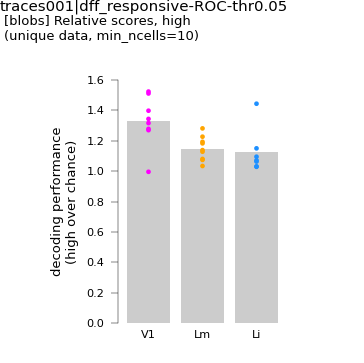

/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_fov/morphlevel/size_single_arousal/dff-ROC__stimulus__noRF__C1.00 rel_scores_high_rel-arousal_blobs


<IPython.core.display.Javascript object>


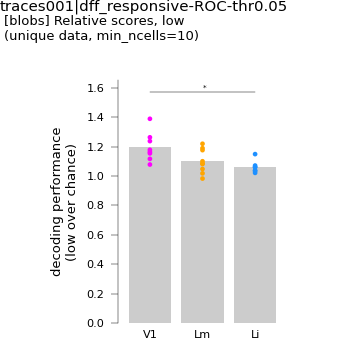

/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_fov/morphlevel/size_single_arousal/dff-ROC__stimulus__noRF__C1.00 rel_scores_low_rel-arousal_blobs


In [86]:
%matplotlib notebook
posthoc = 'fdr_by'
#metric = 'high_rel'
# ---------------------
for metric in ['high', 'low']:
    fig = pplot.plot_standard_panel(df_, '%s_rel' % metric, posthoc=posthoc)
    fig.axes[0].set_ylabel('decoding performance\n(%s over chance)' % metric)
    fig.text(0.01, 0.9, '[%s] Relative scores, %s\n(unique data, min_ncells=%i)' \
             % (experiment, metric, min_ncells), fontsize=7)
    pplot.label_figure(fig, data_id)
    figname = 'rel_scores_%s_rel-arousal_%s' % (metric, experiment)
    pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))
    print(dst_dir, figname)

<IPython.core.display.Javascript object>


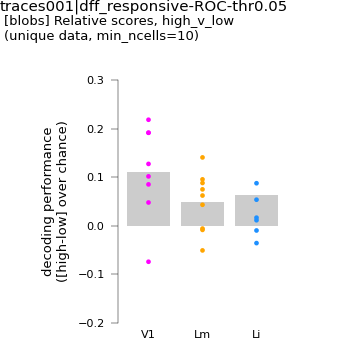

    A   B  Paired  Parametric  U-val       Tail    p-corr p-adjust  eta-square
0  Li  Lm   False       False   27.0  two-sided  1.000000   fdr_by    0.006002
1  Li  V1   False       False   17.0  two-sided  0.616861   fdr_by    0.048600
2  Lm  V1   False       False   19.0  two-sided  0.616861   fdr_by    0.135404
/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_fov/morphlevel/size_single_arousal/dff-ROC__stimulus__noRF__C1.00 rel_scores_high_v_low-arousal_blobs


In [88]:
%matplotlib notebook
posthoc = 'fdr_by'
metric = '%s_v_%s' % (c1, c2)
# ---------------------
fig, stats_ = pplot.plot_standard_panel(df_, metric, posthoc=posthoc,
                                       return_stats=True)
ignore_cols=['Contrast', 'p-unc', 'metric']
print_cols=[p for p in stats_.columns if p not in ignore_cols]
print(stats_[print_cols].to_string())

fig.axes[0].set_ylabel('decoding performance\n([%s-%s] over chance)' % (c1, c2))
fig.axes[0].set_ylim([-0.2, 0.3])
fig.text(0.01, 0.9, '[%s] Relative scores, %s\n(unique data, min_ncells=%i)' \
         % (experiment, metric, min_ncells), fontsize=7)
pplot.label_figure(fig, data_id)

figname = 'rel_scores_%s-arousal_%s' % (metric, experiment)
pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))
print(dst_dir, figname)

## split arousal, split by CONFIG

In [76]:
curr_grouper = ['visual_area', 'datakey', 'condition', 'arousal']
curr_grouper.extend(['train_transform'])
df = maindf[~(maindf.novel)]\
            .groupby(curr_grouper).mean()\
            .reset_index()
df.columns

Index(['visual_area', 'datakey', 'condition', 'arousal', 'train_transform',
       'novel', 'fit_time', 'score_time', 'test_score', 'train_score',
       'heldout_test_score', 'C', 'randi', 'test_transform', 'n_trials',
       'iteration', 'n_cells', 'intact'],
      dtype='object')

In [77]:
compare_var='arousal'
metric='heldout_test_score'
c1 = 'high'
c2 = 'low'
s_=[]
for train_transform, df_ in df.groupby('train_transform'):
    split_ = dec.calculate_relative_scores(df_.copy(), metric=metric,
                                            compare_var=compare_var,
                                            c1=c1, c2=c2)
    split_['train_transform'] = train_transform
    s_.append(split_)
split_scores = pd.concat(s_, axis=0, ignore_index=True)

<IPython.core.display.Javascript object>


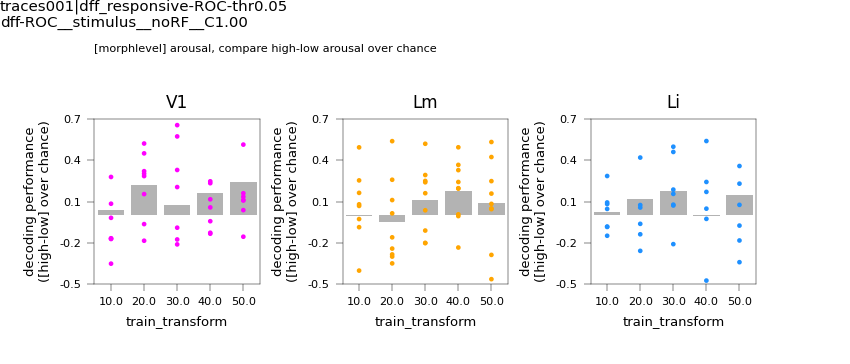

/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_fov/morphlevel/size_single_arousal/dff-ROC__stimulus__noRF__C1.00 split_by_config_acc-over-chance_high-v-low-arousal


In [80]:
fig, axn=pl.subplots(1, 3, figsize=(7,3), dpi=150, sharex=True, sharey=False)
for va, vg in split_scores.groupby('visual_area'):
    ax = axn[visual_areas.index(va)]
    sns.barplot(x='train_transform', y='%s_v_%s' % (c1, c2), data=vg, ax=ax,
            color=[0.7]*3, ci=None)
    sns.stripplot(x='train_transform', y='%s_v_%s' %(c1, c2), data=vg, ax=ax,
            hue='visual_area', palette=area_colors, jitter=False,
            size=5, marker='.')
    ax.set_title(va)
    ax.legend_.remove()
ymin=-0.5
ymax=0.7
for ax in axn.flat:
    ax.set_box_aspect(1)
    ax.set_ylim([ymin, ymax])
    ax.set_yticks(np.linspace(ymin, ymax, 5))
    ax.set_yticklabels([round(i, 1) for i in np.linspace(ymin, ymax, 5)])
    ax.set_ylabel('decoding performance\n([%s-%s] over chance)' % (c1, c2))
pl.subplots_adjust(left=0.1, right=0.8, bottom=0.2, top=0.8, wspace=0.5)

fig.text(0.1, 0.87, '[%s] %s, compare %s-%s arousal over chance' \
         % (class_name, compare_var, c1, c2))

pplot.label_figure(fig, '%s\n%s' % (data_id, aggr_id))
figname = 'split_by_config_acc-over-chance_high-v-low-arousal'
pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))
print(dst_dir, figname)

<IPython.core.display.Javascript object>


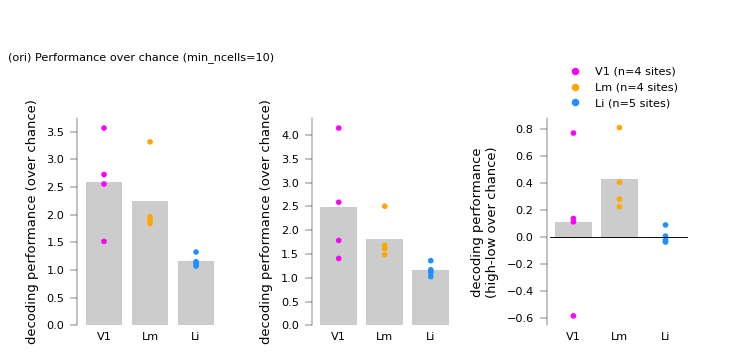

Text(0.01, 0.85, '(ori) Performance over chance (min_ncells=10)')

In [37]:
df_ = scores_over_chance.copy() #
posthoc = 'fdr_by'
fig, axn = pl.subplots(1, 3, figsize=(6,3), dpi=150)
for ax, metric in zip(axn.flat, ['high', 'low', 'high_v_low']):
    maxv = df_[metric].max()
    offset = maxv/15.
    ax, stats_ = pplot.stripplot_metric_by_area(df_, 
                        metric=metric, ax=ax,
                        area_colors=area_colors, posthoc=posthoc,
                        markersize=3, 
                        y_loc=maxv+offset, offset=offset, ylim=None, aspect=1.5,
                        sig_fontsize=6, sig_lw=0.25, jitter=False,
                        return_stats=True, plot_means=True,
                        mean_style='bar', mean_type='mean')
    if metric=='n_cells':
        ylabel = 'N cells'
    else:
        ylabel = 'decoding performance\n(high-low over chance)' \
                if metric=='high_v_low' else 'decoding performance (over chance)'
    if metric=='shuff_v_intact':
        ax.set_ylim([-0.1, 0.3])
    elif metric=='intact':
        ax.set_ylim([0, 2])
        
    ax.set_ylabel(ylabel)
    ax.axhline(y=0, color='k', lw=0.5)
    #ax.set
    #ax.set_ylim([-0.2, 0.3])
pl.subplots_adjust(left=0.1, right=0.85, bottom=0.1, top=0.8, wspace=0.7)
labels = ['%s (n=%i sites)' % (va, dkey_counts.loc[va]) for va in visual_areas]
leg_h = pplot.custom_legend_markers(colors=[area_colors[v] for v in visual_areas],
                                   labels=labels, markers='o', lws=0)
axn[-1].legend(handles=leg_h, bbox_to_anchor=(1,1), loc='lower right', 
               frameon=False, markerscale=0.5)

fig.text(0.01, 0.85, \
    '(%s) Performance over chance (min_ncells=%i)' % (class_name, min_ncells))

# pplot.label_figure(fig, '%s\n%s' % (data_id, aggr_id))
# figname = 'perf_over_chance_break_noisecorrs' 
# pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))
# print(dst_dir, figname)